In [ ]:
import pandas as pd

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
pd.options.display.max_rows

60

In [ ]:
lst = [6, 34, 45]
lst = pd.Series(lst, index=['A','B','C'])
print(lst['B'])
lst

34


A     6
B    34
C    45
dtype: int64

In [ ]:
dict = {
    'Day1':420,
    'Day2':330,
    'Day3':540
}
lst = pd.Series(dict, index=['Day1','Day2'])
lst

Day1    420
Day2    330
dtype: int64

In [ ]:
table = {
    'Cars':['Bmw','Volvo','Audi'],
    'Customers':[150000,90000,170000]
}
df = pd.DataFrame(table,index=[1,2,3])
df

,Cars,Customers
1,Bmw,150000
2,Volvo,90000
3,Audi,170000


In [ ]:
df.loc[1]

Cars            Bmw
Customers    150000
Name: 1, dtype: object

In [ ]:
print(df.to_string())

    Cars  Customers
1    Bmw     150000
2  Volvo      90000
3   Audi     170000


In [ ]:
#JSON
data = {
  "Duration":{
    "0":60,
    "1":60,
    "2":60,
    "3":45,
    "4":45,
    "5":60
  },
  "Pulse":{
    "0":110,
    "1":117,
    "2":103,
    "3":109,
    "4":117,
    "5":102
  },
  "Maxpulse":{
    "0":130,
    "1":145,
    "2":135,
    "3":175,
    "4":148,
    "5":127
  },
  "Calories":{
    "0":409,
    "1":479,
    "2":340,
    "3":282,
    "4":406,
    "5":300
  }
}

df = pd.DataFrame(data)

print(df) 

   Duration  Pulse  Maxpulse  Calories
0        60    110       130       409
1        60    117       145       479
2        60    103       135       340
3        45    109       175       282
4        45    117       148       406
5        60    102       127       300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Duration  6 non-null      int64
 1   Pulse     6 non-null      int64
 2   Maxpulse  6 non-null      int64
 3   Calories  6 non-null      int64
dtypes: int64(4)
memory usage: 412.0+ bytes


In [ ]:
df.dropna(inplace=True)
df.fillna(140, inplace=True)

In [ ]:
# Filling with mean, mode or median
x = df['Pulse'].mean()
df['Pulse'].fillna(x,inplace=True)

In [ ]:
df['Date'] = ['12/12/2022','14/12/2022','14/12/2022','12/12/2022','12/12/2022',pd.NA]
df['Date'] = pd.to_datetime(df['Date'])
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60,110,130,409,2022-12-12
1,60,117,145,479,2022-12-14
2,60,103,135,340,2022-12-14
3,45,109,175,282,2022-12-12
4,45,117,148,406,2022-12-12
5,60,102,127,300,NaT


In [ ]:
df.dropna(subset=['Date'], inplace=True)
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60,110,130,409,2022-12-12
1,60,117,145,479,2022-12-14
2,60,103,135,340,2022-12-14
3,45,109,175,282,2022-12-12
4,45,117,148,406,2022-12-12


In [ ]:
df.loc['3','Calories'] = 145
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60.0,110.0,130.0,409.0,2022-12-12
1,60.0,117.0,145.0,479.0,2022-12-14
2,60.0,103.0,135.0,340.0,2022-12-14
3,45.0,109.0,175.0,145.0,2022-12-12
4,45.0,117.0,148.0,406.0,2022-12-12
3,NaN,NaN,NaN,145.0,NaT


In [ ]:
df.drop(df.tail(1).index,inplace=True)
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60.0,110.0,130.0,409.0,2022-12-12
1,60.0,117.0,145.0,479.0,2022-12-14
2,60.0,103.0,135.0,340.0,2022-12-14
3,45.0,109.0,175.0,145.0,2022-12-12


In [ ]:
for x in df.index:
  if df.loc[x,'Maxpulse']>135:
    df[x,'Maxpulse']=135
df

,Duration,Pulse,Maxpulse,Calories,Date,"(1, Maxpulse)","(3, Maxpulse)"
0,60.0,110.0,130.0,409.0,2022-12-12,135,135
1,60.0,117.0,145.0,479.0,2022-12-14,135,135
2,60.0,103.0,135.0,340.0,2022-12-14,135,135
3,45.0,109.0,175.0,145.0,2022-12-12,135,135


In [ ]:
#Removing last column
df=df.iloc[:,:-1]
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60.0,110.0,130.0,409.0,2022-12-12
1,60.0,117.0,145.0,479.0,2022-12-14
2,60.0,103.0,135.0,340.0,2022-12-14
3,45.0,109.0,175.0,145.0,2022-12-12


In [ ]:
# Index is string need to convert to int
print(df.index.dtype)
df.index = df.index.astype(int)
print(df.index.dtype)

object
int64


In [ ]:
for x in df.index:
  if df.loc[x,'Maxpulse']>135:
    df.loc[x,'Maxpulse']=135
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60.0,110.0,130.0,409.0,2022-12-12
1,60.0,117.0,135.0,479.0,2022-12-14
2,60.0,103.0,135.0,340.0,2022-12-14
3,45.0,109.0,135.0,145.0,2022-12-12


In [ ]:
# Dealing with duplicates
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.397151,-0.801471,0.261111
Pulse,-0.397151,1.000000,0.353347,0.766156
Maxpulse,-0.801471,0.353347,1.000000,-0.237011
Calories,0.261111,0.766156,-0.237011,1.000000


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.drop('Date',inplace=True,axis=1)

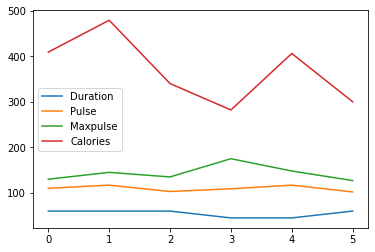

In [ ]:
df.plot()
plt.show()

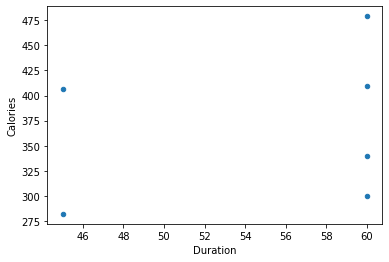

In [ ]:
df.plot(kind='scatter',x='Duration',y='Calories')
plt.show()

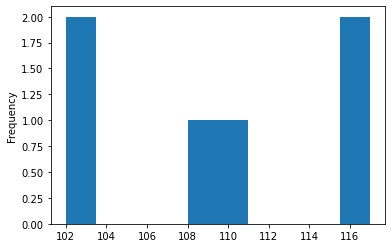

In [ ]:
df['Pulse'].plot(kind='hist')
plt.show()

In [ ]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,6.000000,6.000000,6.000000,6.000000
mean,55.000000,109.666667,143.333333,369.333333
std,7.745967,6.501282,17.557525,75.152290
min,45.000000,102.000000,127.000000,282.000000
25%,48.750000,104.500000,131.250000,310.000000
50%,60.000000,109.500000,140.000000,373.000000
75%,60.000000,115.250000,147.250000,408.250000
max,60.000000,117.000000,175.000000,479.000000


In [ ]:
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,145,479
2,60,103,135,340
3,45,109,175,282
4,45,117,148,406
5,60,102,127,300


In [ ]:
df.to_numpy()

array([[ 60, 110, 130, 409],
       [ 60, 117, 145, 479],
       [ 60, 103, 135, 340],
       [ 45, 109, 175, 282],
       [ 45, 117, 148, 406],
       [ 60, 102, 127, 300]])

In [ ]:
df.T

,0,1,2,3,4,5
Duration,60,60,60,45,45,60
Pulse,110,117,103,109,117,102
Maxpulse,130,145,135,175,148,127
Calories,409,479,340,282,406,300


In [ ]:
df.sort_index(axis=1)

,Calories,Duration,Maxpulse,Pulse
0,409,60,130,110
1,479,60,145,117
2,340,60,135,103
3,282,45,175,109
4,406,45,148,117
5,300,60,127,102


In [ ]:
df.sort_values(by='Calories', ascending=False).loc[:,['Duration','Calories']]

,Duration,Calories
1,60,479
0,60,409
4,45,406
2,60,340
5,60,300
3,45,282


In [ ]:
df[df['Calories']>300]

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,145,479
2,60,103,135,340
4,45,117,148,406


In [ ]:
df[df['Pulse'].isin([117,110])]

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,145,479
4,45,117,148,406


In [ ]:
ser = pd.Series([2,3,4,5,6,7,8,9],index=pd.date_range('20220501',periods=8))
ser

2022-05-01    2
2022-05-02    3
2022-05-03    4
2022-05-04    5
2022-05-05    6
2022-05-06    7
2022-05-07    8
2022-05-08    9
Freq: D, dtype: int64

In [ ]:
df = ser.to_frame(name='Price')
df

,Price
2022-05-01,2
2022-05-02,3
2022-05-03,4
2022-05-04,5
2022-05-05,6
2022-05-06,7
2022-05-07,8
2022-05-08,9


In [ ]:
df.iat[2,0]

4

In [ ]:
df['Price^2'] = pow(df['Price'],2)
df

,Price,Price^2
2022-05-01,2,4
2022-05-02,3,9
2022-05-03,4,16
2022-05-04,5,25
2022-05-05,6,36
2022-05-06,7,49
2022-05-07,8,64
2022-05-08,9,81


In [ ]:
import numpy as np

In [ ]:
df['Fives'] = np.array([5]*len(df))
df

,Price,Price^2,Fives
2022-05-01,2,4,5
2022-05-02,3,9,5
2022-05-03,4,16,5
2022-05-04,5,25,5
2022-05-05,6,36,5
2022-05-06,7,49,5
2022-05-07,8,64,5
2022-05-08,9,81,5


In [ ]:
df['Sixes']=6
df

,Price,Price^2,Fives,Sixes
2022-05-01,2,4,5,6
2022-05-02,3,9,5,6
2022-05-03,4,16,5,6
2022-05-04,5,25,5,6
2022-05-05,6,36,5,6
2022-05-06,7,49,5,6
2022-05-07,8,64,5,6
2022-05-08,9,81,5,6


In [ ]:
df.mean()

Price       5.5
Price^2    35.5
Fives       5.0
Sixes       6.0
dtype: float64

In [ ]:
df.mean(axis=1)

2022-05-01     4.25
2022-05-02     5.75
2022-05-03     7.75
2022-05-04    10.25
2022-05-05    13.25
2022-05-06    16.75
2022-05-07    20.75
2022-05-08    25.25
Freq: D, dtype: float64

In [ ]:
s1=[10,9,9,np.nan,6,5,4,np.nan]

In [ ]:
df1=df.sub(s1,axis='index')
df1

,Price,Price^2,Fives,Sixes
2022-05-01,-8.0,-6.0,-5.0,-4.0
2022-05-02,-6.0,0.0,-4.0,-3.0
2022-05-03,-5.0,7.0,-4.0,-3.0
2022-05-04,NaN,NaN,NaN,NaN
2022-05-05,0.0,30.0,-1.0,0.0
2022-05-06,2.0,44.0,0.0,1.0
2022-05-07,4.0,60.0,1.0,2.0
2022-05-08,NaN,NaN,NaN,NaN


In [ ]:
df1.apply(np.cumsum)

,Price,Price^2,Fives,Sixes
2022-05-01,-8.0,-6.0,-5.0,-4.0
2022-05-02,-14.0,-6.0,-9.0,-7.0
2022-05-03,-19.0,1.0,-13.0,-10.0
2022-05-04,NaN,NaN,NaN,NaN
2022-05-05,-19.0,31.0,-14.0,-10.0
2022-05-06,-17.0,75.0,-14.0,-9.0
2022-05-07,-13.0,135.0,-13.0,-7.0
2022-05-08,NaN,NaN,NaN,NaN


In [ ]:
df1.apply(lambda x: x.max()-x.min())

Price      12.0
Price^2    66.0
Fives       6.0
Sixes       6.0
dtype: float64

In [72]:
df['Names'] = ['Alpha','beTha','gAMMA','OMEga','Delta','zeta']
df['Names'] = df['Names'].str.lower()
df

,Duration,Pulse,Maxpulse,Calories,Names
0,60,110,130,409,alpha
1,60,117,145,479,betha
2,60,103,135,340,gamma
3,45,109,175,282,omega
4,45,117,148,406,delta
5,60,102,127,300,zeta


In [73]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.963308,-0.602180,-0.122696,-0.525922
1,-2.025258,0.794812,-0.711776,0.724899
2,-0.005581,-0.144162,1.061397,-0.490335
3,-1.254471,1.028112,-2.069071,0.441422
4,-0.506381,-0.510028,0.566078,0.439764
5,-0.293913,-0.396942,-0.563292,0.600546
6,0.258998,-0.046067,1.023217,2.204423
7,0.088600,-0.749964,0.275404,2.076963
8,0.411556,-0.772323,-0.393002,-1.100191
9,-1.254826,0.239352,-0.206733,1.160214


In [78]:
parts = [df[:3],df[3:7],df[7:]]
pd.concat(parts)

,0,1,2,3
0,0.963308,-0.602180,-0.122696,-0.525922
1,-2.025258,0.794812,-0.711776,0.724899
2,-0.005581,-0.144162,1.061397,-0.490335
3,-1.254471,1.028112,-2.069071,0.441422
4,-0.506381,-0.510028,0.566078,0.439764
5,-0.293913,-0.396942,-0.563292,0.600546
6,0.258998,-0.046067,1.023217,2.204423
7,0.088600,-0.749964,0.275404,2.076963
8,0.411556,-0.772323,-0.393002,-1.100191
9,-1.254826,0.239352,-0.206733,1.160214
